The objective of the task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Label '1' denotes that the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, objective is to predict the labels on the test dataset.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import nltk
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Twitter Sentiments.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
data.shape

(31962, 3)

In [5]:
def remove_pattern(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) # removed @mentions
    return text

In [6]:
data['tweet'] = data['tweet'].apply(remove_pattern)

In [7]:
data.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
data['tweet'][0]

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [9]:
data['tweet']=data['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [10]:
data.head()

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty
3,4,0,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society #motivation


In [11]:
data['tweet'][0]

'when father dysfunctional selfish drags kids into dysfunction. #run'

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: x.lower())

In [13]:
tokenize = data['tweet'].apply(lambda x: x.split())
tokenize.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: tweet, dtype: object

In [14]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenize= tokenize.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenize.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: tweet, dtype: object

In [15]:
for i in range(len(tokenize)):
    tokenize[i] = " ".join(tokenize[i])

In [16]:
tokenize.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit can't caus they don't offer...
2                                  bihday your majesti
3    #model love take with time urð±!!! ððð...
4                           factsguide: societi #motiv
Name: tweet, dtype: object

In [17]:
data['tweet'] = tokenize

In [18]:
data.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dys...
1,2,0,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesti
3,4,0,#model love take with time urð±!!! ððð...
4,5,0,factsguide: societi #motiv


### EDA

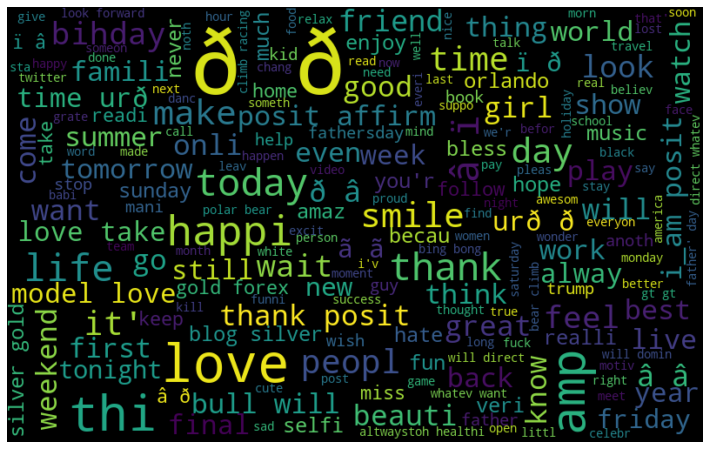

In [19]:
all_words = " ".join([sentence for sentence in data['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

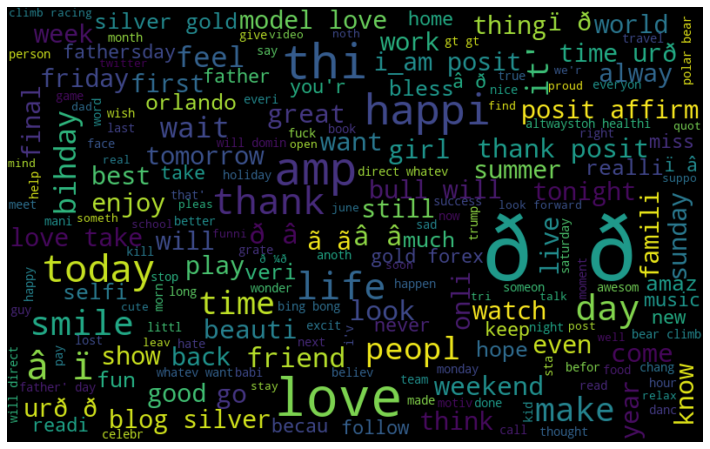

In [20]:
# wordcloud for +ve words
all_words = " ".join([sentence for sentence in data['tweet'][data['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

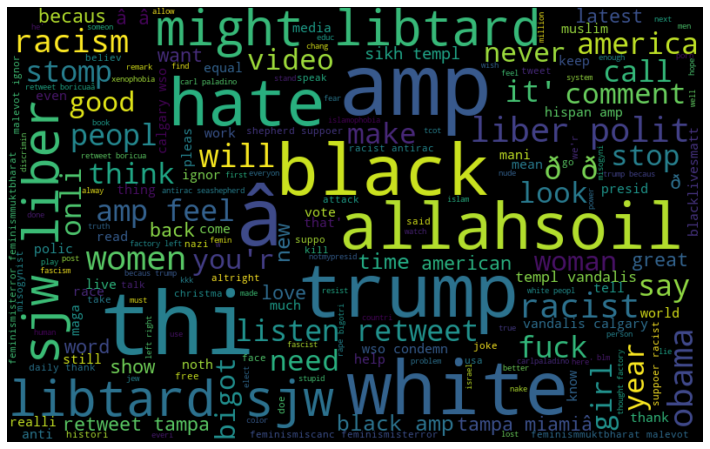

In [21]:
# wordcloud for -ve words
all_words = " ".join([sentence for sentence in data['tweet'][data['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht =re.findall(r'#(\w+)',tweet)
        hashtags.append(ht)
    return hashtags

In [27]:
# extract hashtags for non-racist/sexiest tweets
ht_pos = hashtag_extract(data['tweet'][data['label']==0])

# extract hashtags for racist/sexiest tweets
ht_neg = hashtag_extract(data['tweet'][data['label']==1])

In [31]:
ht_pos[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [32]:
ht_neg[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [34]:
#unnest list 
ht_pos = sum(ht_pos,[])
ht_neg = sum(ht_neg,[])

In [35]:
ht_pos[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [36]:
ht_neg[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [41]:
freq = nltk.FreqDist(ht_pos)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


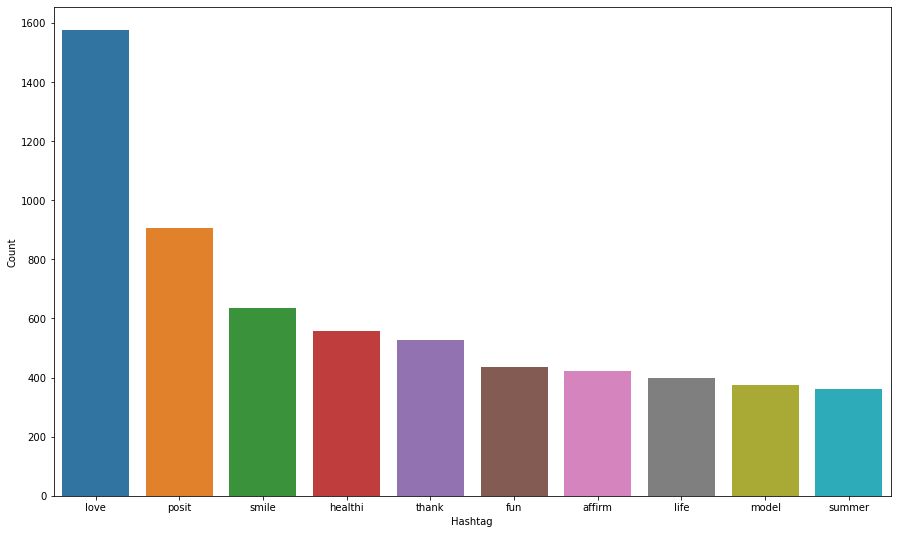

In [49]:
#select top 10 hastags
d = d.nlargest(n=10,columns='Count')
plt.figure(figsize=(15,9))
sns.barplot(x='Hashtag',y='Count',data=d)
plt.show()

In [50]:
freq = nltk.FreqDist(ht_neg)
n = pd.DataFrame({'Hashtag': list(freq.keys()),
                'Count': list(freq.values())})
n.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


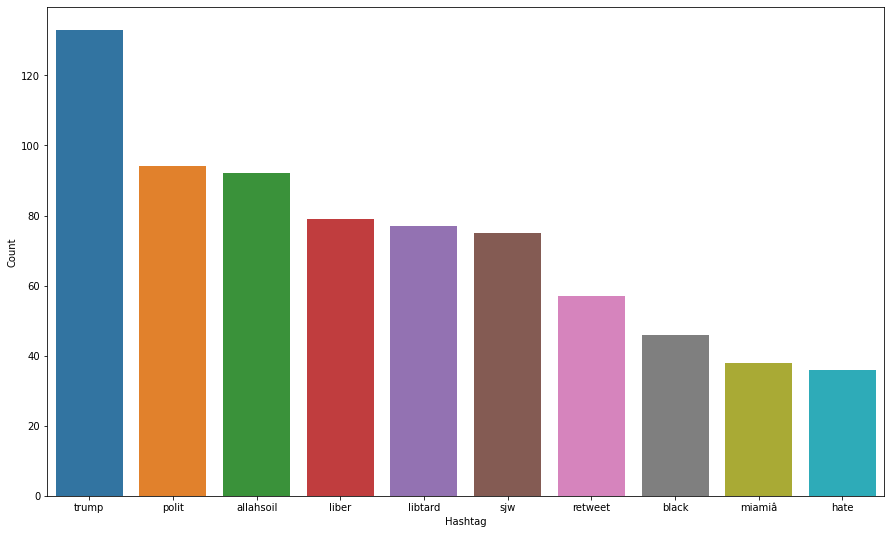

In [51]:
#select top 10 hastags
n = n.nlargest(n=10,columns='Count')
plt.figure(figsize=(15,9))
sns.barplot(x='Hashtag',y='Count',data=n)
plt.show()

## Input Split

In [58]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(data['tweet'])

In [60]:
#bow[0].toarray()

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,data['label'],test_size=0.25)

## Model Training

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [63]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [64]:
pred = model.predict(x_test)
f1_score(y_test,pred)

0.4784130688448075

In [66]:
accuracy_score(y_test,pred)

0.9440620698285571

In [68]:
#use probablity to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1]>=0.3
pred= pred.astype(np.int)

f1_score(y_test,pred)

0.5477099236641221

In [69]:
accuracy_score(y_test,pred)

0.9406832686772619

In [72]:
pred_prob[0][1]

0.0001240579957413507